# 2000 2P6 Q3 Simulation
A system has the transfer function
$$G(s) = \frac{2}{s(s+1)(s+2)}$$
and a controller $K(s)$, connected as shown in Fig. 3. 
(a) Using the semi-log paper provided, sketch clearly the Bode plots for $G(s)$. 

(b) From your plots, estimate the gian and phase margins, if proportional control is used with $K(s) = 1$. 

(c) A phase compensator is used to replace the original controler, such that 
$$K(s) = \frac{8(s+0.5)}{s+4}$$
Modify your Bode plots to take account of this controller and determine the new gain and phase margins, showing your constructions clearly. 

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import control as ctr

### Part (a)

We expect to see drops at $\omega = 1~\mathrm{rad~s^{-1}}$ and $\omega = 2~\mathrm{rad~s^{-1}}$

To use the control environment, we will expand the denominator of $G(s)$, so
$$G(s) = \frac{2}{s^3 + 3s^2 + 2s}$$

The `ctr.tf` function defines the transfer function. Its arguments contain a numerator and a denominator (i.e. `ctr.tf(numerator, denominator)`), where the numerator and denominator are arrays containing the polynomial coefficients. 
For a polynomial $\dfrac{p(s)}{q(s)}$, 
$$p(s) = \sum_{k=0}^m p_i s^k, \quad q(s) = \sum_{k=0}^n q_i s^k$$
- `numerator` $ = [p_m, p_{m-1}, \dots, p_1, p_0]$
- `denominator` $ = [q_n, q_{n-1}, \dots, p_1, p_0]$

(See https://python-control.readthedocs.io/en/stable/generated/control.tf.html)

The `ctr.frequency_response` function takes the system (transfer function) and a set of frequencies as its arguments (i.e. `ctr.frequency_response(G, omegas)`). (See https://python-control.readthedocs.io/en/stable/generated/control.frequency_response.html)
It can output a multitude of arrays, including `magnitude`, `phase` and `omega` (which is the list of all frequencies used)

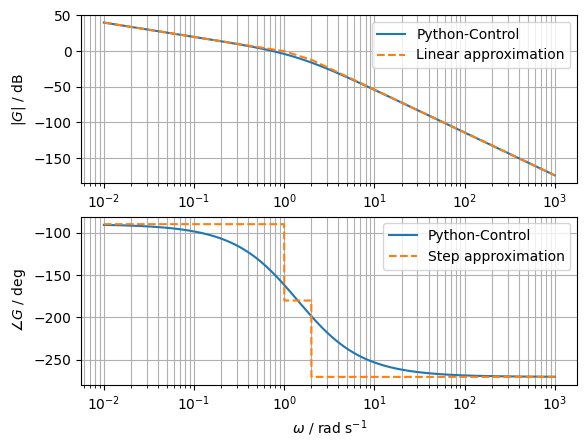

In [61]:
'''Define the transfer function G'''
G = ctr.tf([2], [1, 3, 2, 0])

'''Define array of frequencies spaced logarithmically'''
omegas = np.logspace(-2, 3, 10000)

'''Get array of the magnitudes and phases'''
mag = ctr.frequency_response(G, omegas).magnitude   # Gets array of magnitudes from the frequency response function
phase_rad = ctr.frequency_response(G, omegas).phase # Gets array of phases from the frequency response function

# Convert magnitude to dB
mag_dB = 20 * np.log10(mag)

# Unwrap to get continuous phase
phase_rad = np.unwrap(phase_rad)    # The unwrap function adds 2n*pi to an angle (rad) to maintain continuity. See https://numpy.org/doc/stable/reference/generated/numpy.unwrap.html

# Convert phase to degrees
phase_deg = phase_rad / (np.pi) * 180

'''Linear approximation'''
def G_linear_approx():

    # initialise magnitude and phase lists
    mag_list = []
    phase_list = []

    # calculate magnitude and phase
    for omega in omegas:
        if omega < 1:
            mag_list.append(-20*np.log10(omega))
            phase_list.append(-90)
        elif omega < 2:
            mag_list.append(-40*np.log10(omega))
            phase_list.append(-180)
        else:
            mag_list.append(20*np.log10(2) - 60*np.log10(omega))
            phase_list.append(-270)
    
    return mag_list, phase_list


'''Define plot'''
def G_plot():
    plt.figure()

    # Bode magnitude plot
    plt.subplot(2, 1, 1)

    # Calculated using the control package
    plt.semilogx(omegas, mag_dB, label='Python-Control')

    # Calculated using the linear approximation
    plt.semilogx(omegas, G_linear_approx()[0], label='Linear approximation', linestyle='dashed')

    plt.grid(visible=True, which='major', axis='both')
    plt.grid(visible=True, which='minor', axis='both')
    plt.ylabel(r'$|G|$ / dB')
    plt.legend()

    # Bode phase plot
    plt.subplot(2, 1, 2)

    # Calculated using the control package
    plt.semilogx(omegas, phase_deg, label='Python-Control')

    # Calculated using the linear approximation 
    plt.semilogx(omegas, G_linear_approx()[1], label='Step approximation', linestyle='dashed')

    plt.grid(visible=True, which='major', axis='both')
    plt.grid(visible=True, which='minor', axis='both')
    plt.ylabel(r'$\angle G$ / deg')
    plt.xlabel(r'$\omega$ / rad s$^{-1}$')
    plt.legend()

    plt.show()

G_plot()

### Part (b)

To calculate the phase and gain margins, we will use the control package in Python to obtain these values automatically. 

The `ctr.margin` function takes the system (transfer function) as its argument (i.e. `ctr.margin(G)`) and output a tuple `(gm, pm, wcg, wcp)`, where
- `gm` is the gain margin
- `pm` is the phase margin 
- `wcg` is the crossover frequency associated with the gain margin ($\omega$ when $\angle G = 180\degree$)
- `wcp` is the crossover frequency associated with the phase margin ($\omega$ when $|G| = 1$)

In [56]:
'''Find the gain margin'''
gain_margin = ctr.margin(G)[0]      # Obtains the gain margin
gain_margin_freq = ctr.margin(G)[2] # Obtains the crossover frequency associated with the gain margin 

'''Find the phase margin'''
phase_margin = ctr.margin(G)[1]         # Obtains the phase margin
phase_margin_freq = ctr.margin(G)[3]    # Obtains the crossover frequency associated with the phase margin 

print(f'The gain margin is {round(gain_margin, 3)} and occurs at frequency {round(gain_margin_freq, 3)} rad/s')
print(f'The gain margin is {round(phase_margin, 3)} and occurs at frequency {round(phase_margin_freq, 3)} rad/s')

The gain margin is 3.0 and occurs at frequency 1.414 rad/s
The gain margin is 32.613 and occurs at frequency 0.749 rad/s


### Part (c)
Modified open-loop transfer function $G(s)K(s)$ is
$$\frac{16s + 8}{s^4 + 6s^3 + 11s^2 + 12s}$$

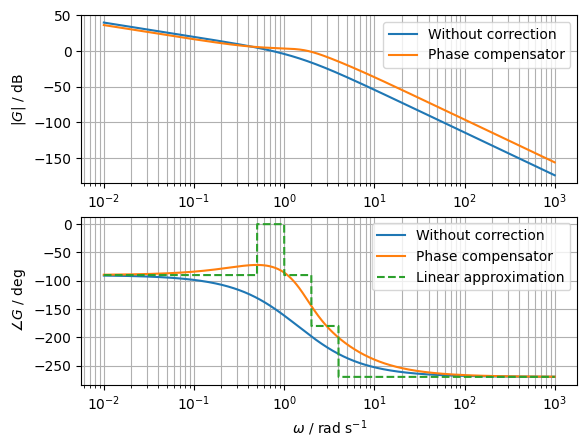

In [66]:
'''Define the transfer function GK'''
GK = ctr.tf([16, 8], [1, 6, 11, 12, 0])

'''Get array of the magnitudes and phases'''
mag_GK = ctr.frequency_response(GK, omegas).magnitude   # Gets array of magnitudes from the frequency response function
phase_rad_GK = ctr.frequency_response(GK, omegas).phase # Gets array of phases from the frequency response function

# Convert magnitude to dB
mag_dB_GK = 20 * np.log10(mag_GK)

# Unwrap to get continuous phase
phase_rad_GK = np.unwrap(phase_rad_GK)    # The unwrap function adds 2n*pi to an angle (rad) to maintain continuity. See https://numpy.org/doc/stable/reference/generated/numpy.unwrap.html

# Convert phase to degrees
phase_deg_GK = phase_rad_GK / (np.pi) * 180
'''Linear approximation'''

def GK_linear_approx():

    # initialise magnitude and phase lists
    mag_list = []
    phase_list = []

    # calculate magnitude and phase
    for omega in omegas:
        if omega < 0.5:
            phase_list.append(-90)
        elif omega < 1:
            phase_list.append(0)
        elif omega < 2:
            phase_list.append(-90)
        elif omega < 4:
            phase_list.append(-180)
        else:
            phase_list.append(-270)
    
    return mag_list, phase_list

'''Define Plot'''
def GK_plot():
    plt.figure()

    # Bode magnitude plot
    plt.subplot(2, 1, 1)

    # Calculated using the control package
    plt.semilogx(omegas, mag_dB, label='Without correction')
    plt.semilogx(omegas, mag_dB_GK, label='Phase compensator')

    # Calculated using the linear approximation
    # plt.semilogx(omegas, G_linear_approx()[0], label='Linear approximation', linestyle='dashed')

    plt.grid(visible=True, which='major', axis='both')
    plt.grid(visible=True, which='minor', axis='both')
    plt.ylabel(r'$|G|$ / dB')
    plt.legend()

    # Bode phase plot
    plt.subplot(2, 1, 2)

    # Calculated using the control package
    plt.semilogx(omegas, phase_deg, label='Without correction')
    plt.semilogx(omegas, phase_deg_GK, label='Phase compensator')

    # Calculated using the linear approximation 
    plt.semilogx(omegas, GK_linear_approx()[1], label='Linear approximation', linestyle='dashed')

    plt.grid(visible=True, which='major', axis='both')
    plt.grid(visible=True, which='minor', axis='both')
    plt.ylabel(r'$\angle G$ / deg')
    plt.xlabel(r'$\omega$ / rad s$^{-1}$')
    plt.legend()

    plt.show()

GK_plot()